similar from sklearn https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

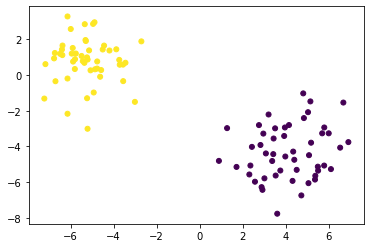

In [2]:
X_1, y_1 = make_blobs(n_features=2, centers=2, cluster_std=1.25, random_state=123)
plt.scatter(X_1[:, 0], X_1[:, 1], c=y_1, s=25);

In [3]:
from sklearn.svm import SVC

In [4]:
clf = SVC(kernel='linear').fit(X_1, y_1)

In [5]:
print(clf.coef_)

[[-0.4171222   0.14320341]]


X_1 is an array of 2D coordinates with X[:, 0] the x and X[:, 1] the y

In [6]:
# separate the 2D array into 2x 1D arrays
X_1_feature_1 = X_1[:, 0]
X_1_feature_2 = X_1[:, 1]


In [7]:
# set the min and max of each feature so that a graph can be set up correctly
X11_min, X11_max = min(X_1_feature_1) - 1, max(X_1_feature_1) + 1
X12_min, X12_max = min(X_1_feature_2) - 1, max(X_1_feature_2) + 1

In [9]:
# define a set of coordinates between the min and max of each feature
x11_coord = np.linspace(X11_min, X11_max, 10)
x12_coord = np.linspace(X12_min, X12_max, 10)

In [10]:
# set up a mesh grid of the space for the features
X12_C, X11_C = np.meshgrid(x12_coord, x11_coord)

In [17]:
# convert the mesh grid into a 2D array of coordinates
x11x12 = np.c_[np.ravel(X11_C), np.ravel(X12_C)]

In [20]:
# will return the distance from each sample to each location on the grid
decisions = clf.decision_function(x11x12)

In [21]:
decisions

array([ 2.13377589,  2.34156734,  2.54935879,  2.75715025,  2.9649417 ,
        3.17273315,  3.38052461,  3.58831606,  3.79610751,  4.00389897,
        1.38538115,  1.5931726 ,  1.80096406,  2.00875551,  2.21654696,
        2.42433842,  2.63212987,  2.83992132,  3.04771277,  3.25550423,
        0.63698641,  0.84477787,  1.05256932,  1.26036077,  1.46815222,
        1.67594368,  1.88373513,  2.09152658,  2.29931804,  2.50710949,
       -0.11140833,  0.09638313,  0.30417458,  0.51196603,  0.71975749,
        0.92754894,  1.13534039,  1.34313185,  1.5509233 ,  1.75871475,
       -0.85980306, -0.65201161, -0.44422016, -0.2364287 , -0.02863725,
        0.1791542 ,  0.38694565,  0.59473711,  0.80252856,  1.01032001,
       -1.6081978 , -1.40040635, -1.1926149 , -0.98482344, -0.77703199,
       -0.56924054, -0.36144908, -0.15365763,  0.05413382,  0.26192528,
       -2.35659254, -2.14880109, -1.94100963, -1.73321818, -1.52542673,
       -1.31763527, -1.10984382, -0.90205237, -0.69426091, -0.48

In [26]:
# the decisions_function returned a 1D array, it must be reshaped to be used 
# with the axes.contour function when plotting

df1 = np.reshape(decisions, X12_C.shape) # shape is (10, 10) in this case

In [32]:
df1

array([[ 2.13377589,  2.34156734,  2.54935879,  2.75715025,  2.9649417 ,
         3.17273315,  3.38052461,  3.58831606,  3.79610751,  4.00389897],
       [ 1.38538115,  1.5931726 ,  1.80096406,  2.00875551,  2.21654696,
         2.42433842,  2.63212987,  2.83992132,  3.04771277,  3.25550423],
       [ 0.63698641,  0.84477787,  1.05256932,  1.26036077,  1.46815222,
         1.67594368,  1.88373513,  2.09152658,  2.29931804,  2.50710949],
       [-0.11140833,  0.09638313,  0.30417458,  0.51196603,  0.71975749,
         0.92754894,  1.13534039,  1.34313185,  1.5509233 ,  1.75871475],
       [-0.85980306, -0.65201161, -0.44422016, -0.2364287 , -0.02863725,
         0.1791542 ,  0.38694565,  0.59473711,  0.80252856,  1.01032001],
       [-1.6081978 , -1.40040635, -1.1926149 , -0.98482344, -0.77703199,
        -0.56924054, -0.36144908, -0.15365763,  0.05413382,  0.26192528],
       [-2.35659254, -2.14880109, -1.94100963, -1.73321818, -1.52542673,
        -1.31763527, -1.10984382, -0.90205237

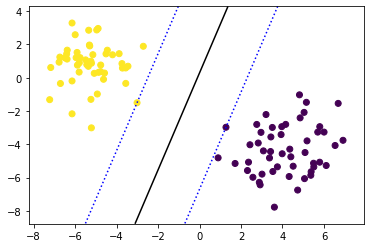

In [31]:
plt.scatter(X_1_feature_1, X_1_feature_2, c=y_1)
axes = plt.gca()
axes.contour(X11_C, X12_C, df1, colors=['blue', 'black', 'blue'], 
             levels=[-1, 0, 1], linestyles=[':', '-', ':'])
plt.show()

In [34]:
X12_C

array([[-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186,  2.83273494,  4.28375802],
       [-8.77544968, -7.3244266 , -5.87340353, -4.42238045, -2.97135737,
        -1.52033429, -0.06931121,  1.38171186